In [281]:
import matplotlib.pyplot as plt
import numpy as np

### Question 1

In [301]:
## I set the value of r in Coulomb's law to 1 since it is aribtrary.
## I set the value of Q to the elementary charge q, since nothing was specified.
q=1.602*10**(-19)
k_const = 8.987*10**(9)

def net_forces_Question1(n,m):
    if n==0 and m==0:
        return 0
    else:
        x_forces,y_forces = [],[]
    
        angle=360/n
    
        temp=0
        for i in range(np.int(m)):
            y_forces.append(k_const*q*(q/m)*np.cos((temp+angle/2) * np.pi / 180))
            x_forces.append(k_const*q*(q/m)*np.sin((temp+angle/2) * np.pi / 180))
            temp = temp+angle
        
        net_y = np.sum([y_forces])
        net_x = np.sum([x_forces])
    
        net_force = np.sqrt(net_y**2 + net_x**2)
    
    return net_force

#### Veryfing cases

In [302]:
print(net_forces_Question1(50,50))
### For n=m , net force is 0 (here we have a very small fluctuation as it should).

2.735118390461879e-43


In [303]:
print(net_forces_Question1(13,12))
print(net_forces_Question1(13,1)/12)

### Indeed both agree. A division by 12 in the 13,1 case since the function
### net_forces_Question1 divides the charges by m.

1.922022729000008e-29
1.922022729e-29


In [304]:
print(net_forces_Question1(0,0))

0


### Question 2

In [307]:
import numpy as np

### Function that takes n , and returns a net x force and net y force
### at the middle Q charge.
def net_forces_Question2(n):
    x_forces,y_forces = [],[]
    
    m = (n-1)/2
    angle=360/n
    
    temp=0
    for i in range(np.int(m)):
        y_forces.append(k_const*q*(q/m)*np.cos((temp+angle/2) * np.pi / 180))
        x_forces.append(k_const*q*(q/m)*np.sin((temp+angle/2) * np.pi / 180))
        temp = temp+angle
        
    net_y = np.sum([y_forces])
    net_x = np.sum([x_forces])
    
    net_force = np.sqrt(net_y**2 + net_x**2)
    
    return net_force

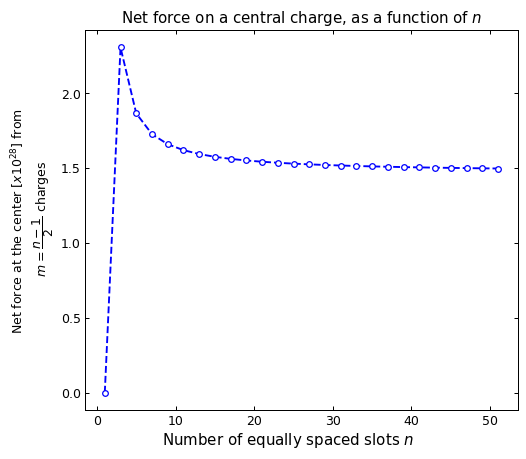

In [314]:
from matplotlib import pyplot as plt

### Function that accumulates net forces for multiple values of n, so 
### that they may be distributed on a F_x vs n and F_y vs n graph
def graph_distribution(n):
    force_list,n_list= [],[]
    
    k=1
    for i in range ((np.int(n)+1)//2):
        n_list.append(k)
        force_list.append(net_forces_Question2(k))
        k=k+2
    return force_list, n_list
    

forces_list, n_list = graph_distribution(51)

forces_list=[item*10**28 for item in forces_list]

###############

fig, a0, = plt.subplots(
    figsize=(6,5),
    dpi=90,                 
)
a0.plot(n_list,
        forces_list,
        '--b.',
        marker=".",
        markersize=9,
        markerfacecolor="white",)
a0.set_ylabel("Net force at the center $[x 10^{28}]$ from \n $m=\dfrac{n-1}{2}$ charges",size="medium")
a0.set_title("Net force on a central charge, as a function of $n$")

fig.tight_layout()
plt.gcf().text(0.55,0.0005,r"Number of equally spaced slots $n$", ha="center", size="large")
a0.tick_params(axis='y', direction="in", right=True)
a0.tick_params(axis='x', direction="in", top=True)